<a href="https://colab.research.google.com/github/MalVaroTor/MalVaroTor/blob/main/TCC_1_DESCOBRINDO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IRMPORTANDO BIBLIOTECAS E LENDO O ARQUIVO EM EXCEL.**


---

O NOME DO ARQUIVO VAI TER O NOME DE 'db', DE DATABASE.

In [2]:
import pandas as pd                 # IMPORTANDO BIBLIOTECA PARA DADOS

import matplotlib.pyplot as plt     # IMPORTANDO BIBLIOTECA PARA GRÁFICOS.

import numpy as np                  # IMPOTANDO BIBLIOTECA PARA TRABALHAR COM NÚMEROS.

db = pd.read_excel('/content/drive/MyDrive/TCC/db_dados/Dados_I_V_2023.xlsx')

display(db)

,HORA,Corrente_A_[A],Corrente_B_[A],Tensao_A_[V],Tensao_B_[V],PowerSet_[%]
0,2023-02-02 09:45:30.000,0.2,0.0,0.0,0.0,30.0
1,2023-02-02 09:45:45.000,0.2,0.0,0.0,0.0,30.0
2,2023-02-02 09:46:00.000,0.2,0.0,0.0,0.0,30.0
3,2023-02-02 09:46:15.000,0.2,0.0,0.0,0.0,30.0
4,2023-02-02 09:46:30.000,0.2,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...
58744,2023-12-29 11:23:47.834,0.0,0.0,0.0,0.0,0.0
58745,2023-12-29 11:24:02.834,0.0,0.0,0.0,0.0,0.0
58746,2023-12-29 11:24:17.834,0.0,0.0,0.0,0.0,0.0
58747,2023-12-29 11:24:32.834,0.0,0.0,0.0,0.0,0.0


# **MOSTRANDO OS TIPOS DE DADOS DO DB.**

---



In [3]:
tipos_dados = db.dtypes

print(tipos_dados)

HORA              datetime64[ns]
Corrente_A_[A]           float64
Corrente_B_[A]           float64
Tensao_A_[V]             float64
Tensao_B_[V]             float64
PowerSet_[%]             float64
dtype: object


# **FILTRANDO A TABELA PARA APENAS 1 DIA EM ESPECÍFICO.**

---

O DB DO DIA SERÁ CHAMADO 'db_dia'.

In [4]:
db_dia = db.loc[db['HORA'].dt.date == pd.to_datetime('2023-02-02').date()]

display(db_dia)

,HORA,Corrente_A_[A],Corrente_B_[A],Tensao_A_[V],Tensao_B_[V],PowerSet_[%]
0,2023-02-02 09:45:30,0.2,0.0,0.0,0.0,30.0
1,2023-02-02 09:45:45,0.2,0.0,0.0,0.0,30.0
2,2023-02-02 09:46:00,0.2,0.0,0.0,0.0,30.0
3,2023-02-02 09:46:15,0.2,0.0,0.0,0.0,30.0
4,2023-02-02 09:46:30,0.2,0.0,0.0,0.0,30.0
...,...,...,...,...,...,...
332,2023-02-02 11:08:30,0.2,1.3,0.7,0.0,50.0
333,2023-02-02 11:08:45,0.2,1.3,0.7,0.0,30.0
334,2023-02-02 11:09:00,0.2,1.3,0.7,0.0,30.0
335,2023-02-02 11:09:15,0.2,1.3,0.7,0.0,30.0


# **CRIANDO E FORMATANDO O GRÁFICO.**

---



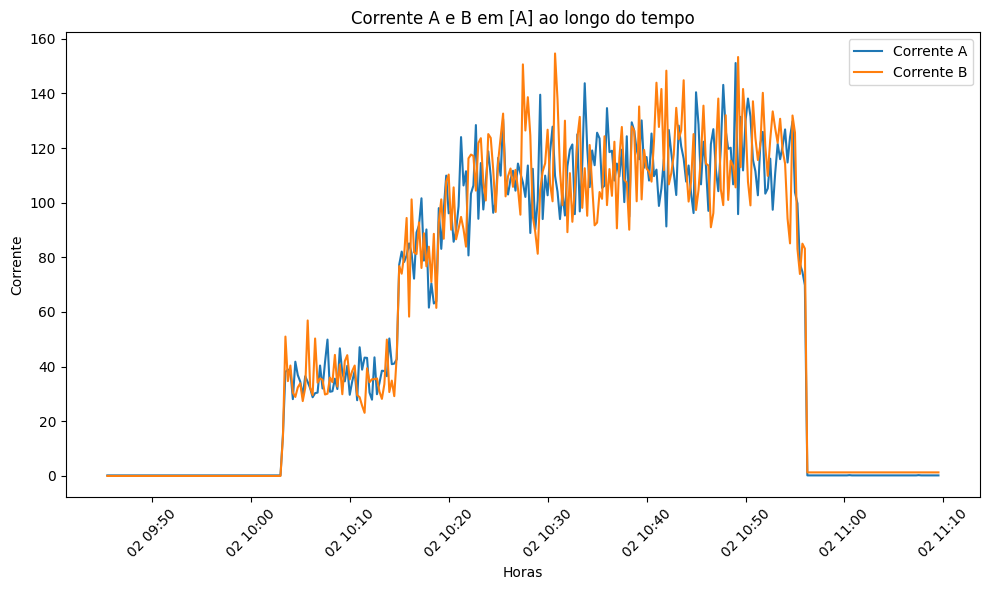

In [5]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(db_dia['HORA'], db_dia['Corrente_A_[A]'], label='Corrente A')
plt.plot(db_dia['HORA'], db_dia['Corrente_B_[A]'], label='Corrente B')

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Corrente')
plt.title('Corrente A e B em [A] ao longo do tempo')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

# **CALCULANDO A POTÊNCIA DE A E COLOCANDO A COLUNA NO FINAL DA TABELA.**

---



In [6]:
db_dia['Potencia_A_[kW]'] = db_dia['Corrente_A_[A]'] * db_dia['Tensao_A_[V]'] / 1000

colunas = db_dia.columns.tolist()
colunas.remove('Potencia_A_[kW]')
colunas.append('Potencia_A_[kW]')
db_dia = db_dia[colunas]

display(db_dia)

<ipython-input-6-17d7a41563f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_dia['Potencia_A_[kW]'] = db_dia['Corrente_A_[A]'] * db_dia['Tensao_A_[V]'] / 1000


,HORA,Corrente_A_[A],Corrente_B_[A],Tensao_A_[V],Tensao_B_[V],PowerSet_[%],Potencia_A_[kW]
0,2023-02-02 09:45:30,0.2,0.0,0.0,0.0,30.0,0.00000
1,2023-02-02 09:45:45,0.2,0.0,0.0,0.0,30.0,0.00000
2,2023-02-02 09:46:00,0.2,0.0,0.0,0.0,30.0,0.00000
3,2023-02-02 09:46:15,0.2,0.0,0.0,0.0,30.0,0.00000
4,2023-02-02 09:46:30,0.2,0.0,0.0,0.0,30.0,0.00000
...,...,...,...,...,...,...,...
332,2023-02-02 11:08:30,0.2,1.3,0.7,0.0,50.0,0.00014
333,2023-02-02 11:08:45,0.2,1.3,0.7,0.0,30.0,0.00014
334,2023-02-02 11:09:00,0.2,1.3,0.7,0.0,30.0,0.00014
335,2023-02-02 11:09:15,0.2,1.3,0.7,0.0,30.0,0.00014


# **DELETANDO A COLUNA 'PotenciaA'.**

---





In [7]:
# db_dia = db_dia.drop(columns=['PotenciaA'])

# display(db_dia)

# **CALCULANDO A POTÊNCIA DE B E COLOCANDO A COLUNA NO FINAL DA TABELA.**

---


In [8]:
# Calcular a nova coluna
db_dia['Potencia_B_[kW]'] = db_dia['Corrente_B_[A]'] * db_dia['Tensao_B_[V]'] / 1000


# Reordenar as colunas para colocar 'Potencia' no final
colunas = db_dia.columns.tolist()
colunas.remove('Potencia_B_[kW]')
colunas.append('Potencia_B_[kW]')
db_dia = db_dia[colunas]

display(db_dia)

,HORA,Corrente_A_[A],Corrente_B_[A],Tensao_A_[V],Tensao_B_[V],PowerSet_[%],Potencia_A_[kW],Potencia_B_[kW]
0,2023-02-02 09:45:30,0.2,0.0,0.0,0.0,30.0,0.00000,0.0
1,2023-02-02 09:45:45,0.2,0.0,0.0,0.0,30.0,0.00000,0.0
2,2023-02-02 09:46:00,0.2,0.0,0.0,0.0,30.0,0.00000,0.0
3,2023-02-02 09:46:15,0.2,0.0,0.0,0.0,30.0,0.00000,0.0
4,2023-02-02 09:46:30,0.2,0.0,0.0,0.0,30.0,0.00000,0.0
...,...,...,...,...,...,...,...,...
332,2023-02-02 11:08:30,0.2,1.3,0.7,0.0,50.0,0.00014,0.0
333,2023-02-02 11:08:45,0.2,1.3,0.7,0.0,30.0,0.00014,0.0
334,2023-02-02 11:09:00,0.2,1.3,0.7,0.0,30.0,0.00014,0.0
335,2023-02-02 11:09:15,0.2,1.3,0.7,0.0,30.0,0.00014,0.0


# **GERANDO O GRÁFICO DE POTÊNCIA E CALCULANDO A ENERGIA DE A AO LONGO DO TEMPO.**

---



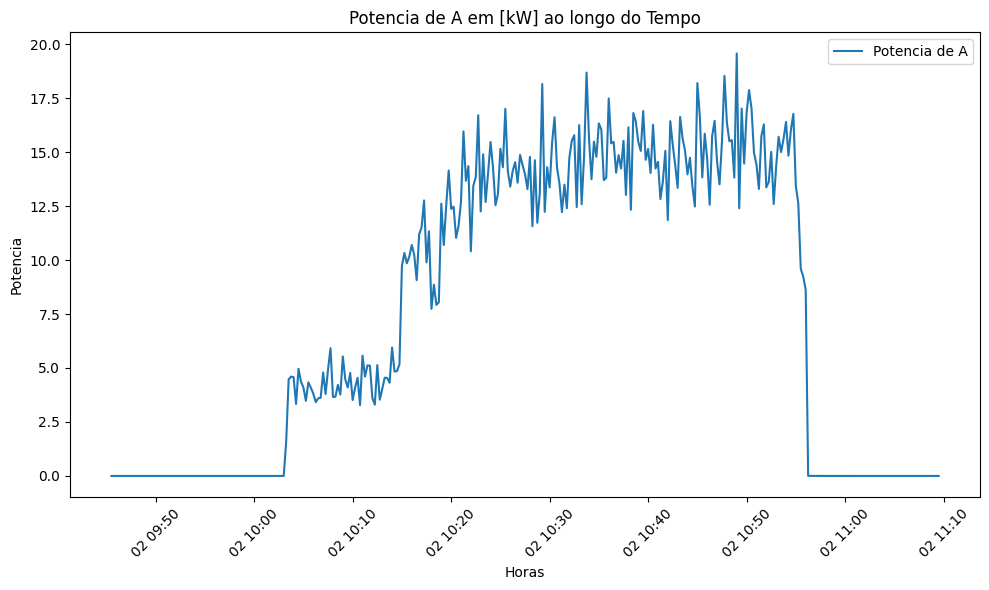

In [9]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(db_dia['HORA'], db_dia['Potencia_A_[kW]'], label='Potencia de A')

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Potencia')
plt.title('Potencia de A em [kW] ao longo do Tempo')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

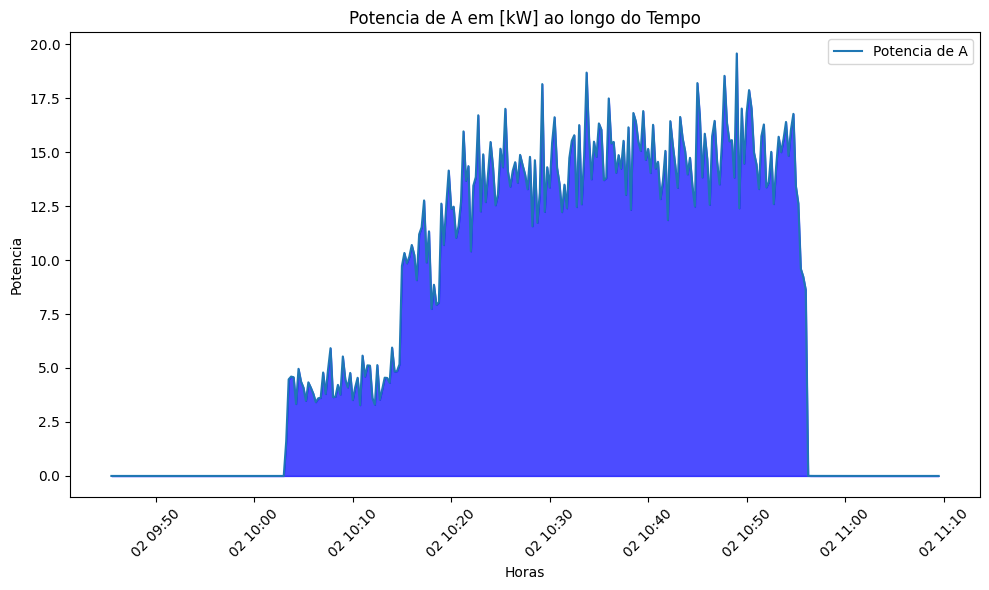

In [10]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(db_dia['HORA'], db_dia['Potencia_A_[kW]'], label='Potencia de A')

plt.fill_between(db_dia['HORA'], db_dia['Potencia_A_[kW]'], color='blue', alpha=0.7)

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Potencia')
plt.title('Potencia de A em [kW] ao longo do Tempo')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [11]:
integral_PotenciaA = np.trapz(db_dia['Potencia_A_[kW]'], db_dia['HORA'])

# Imprimir o resultado
print("Energia de A:", integral_PotenciaA )

Energia de A: 37744093799943 nanoseconds


# **GERANDO O GRÁFICO DE POTÊNCIA E CALCULANDO A ENERGIA DE B AO LONGO DO TEMPO.**

---



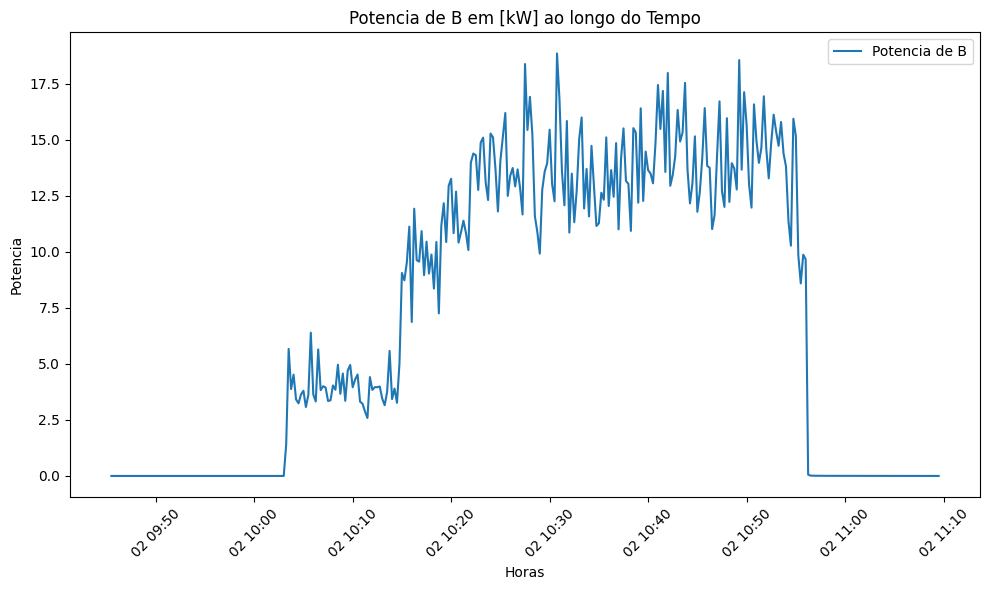

In [12]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(db_dia['HORA'], db_dia['Potencia_B_[kW]'], label='Potencia de B')

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Potencia')
plt.title('Potencia de B em [kW] ao longo do Tempo')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

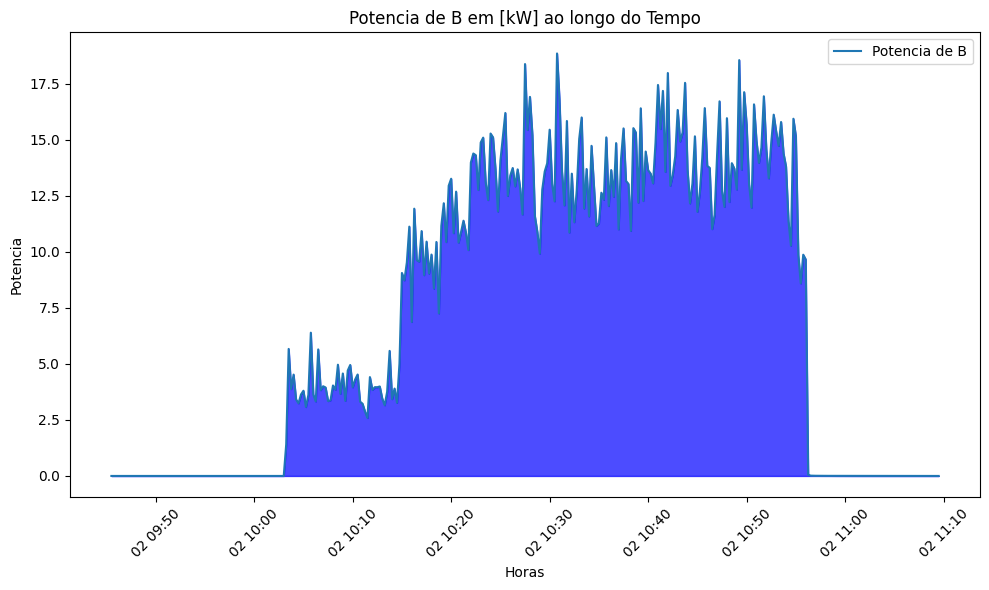

In [13]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(db_dia['HORA'], db_dia['Potencia_B_[kW]'], label='Potencia de B')

plt.fill_between(db_dia['HORA'], db_dia['Potencia_B_[kW]'], color='blue', alpha=0.7)

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Potencia')
plt.title('Potencia de B em [kW] ao longo do Tempo')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

In [14]:
integral_PotenciaA = np.trapz(db_dia['Potencia_B_[kW]'], db_dia['HORA'])

# Imprimir o resultado
print("Energia de B:", integral_PotenciaA )

Energia de B: 35605759049952 nanoseconds


# **TESTES**

---



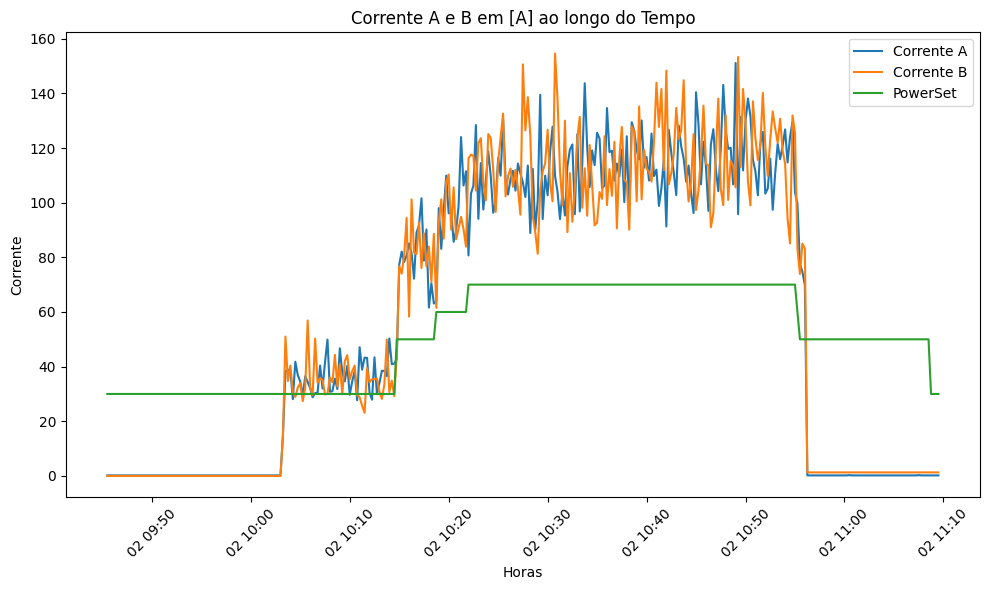

In [15]:
plt.figure(figsize=(10, 6))

# Plotar os dados
plt.plot(db_dia['HORA'], db_dia['Corrente_A_[A]'], label='Corrente A')
plt.plot(db_dia['HORA'], db_dia['Corrente_B_[A]'], label='Corrente B')
plt.plot(db_dia['HORA'], db_dia['PowerSet_[%]'], label='PowerSet')

# Adicionar rótulos aos eixos
plt.xlabel('Horas')
plt.ylabel('Corrente')
plt.title('Corrente A e B em [A] ao longo do Tempo')

# Adicionar legenda
plt.legend()

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

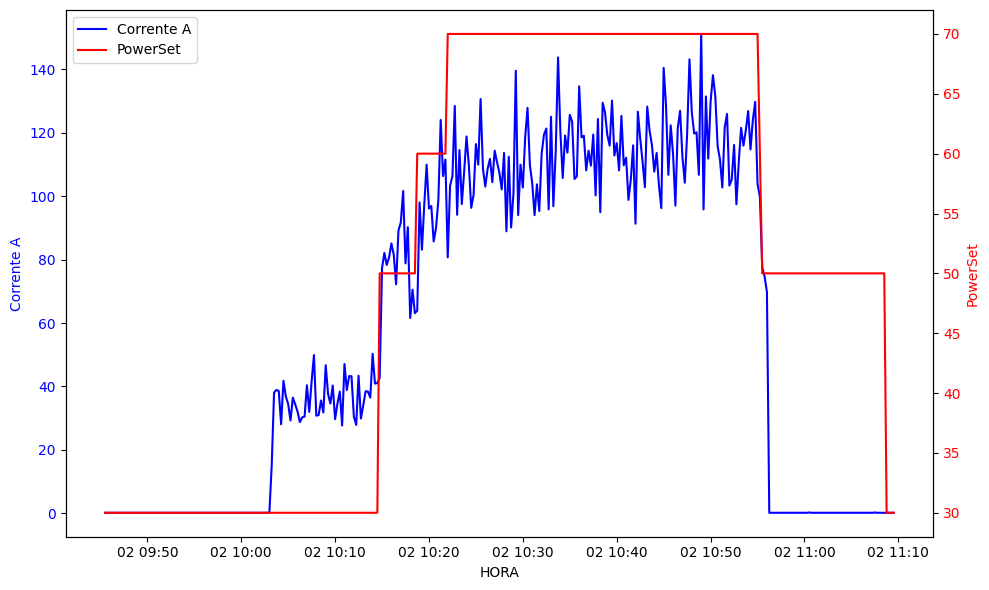

In [16]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar os dados para o primeiro eixo y (esquerda)
ax1.plot(db_dia['HORA'], db_dia['Corrente_A_[A]'], label='Corrente A', color='blue')
ax1.set_xlabel('HORA')
ax1.set_ylabel('Corrente A', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Criar o segundo eixo y (direita)
ax2 = ax1.twinx()
ax2.plot(db_dia['HORA'], db_dia['PowerSet_[%]'], label='PowerSet', color='red')
ax2.set_ylabel('PowerSet', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

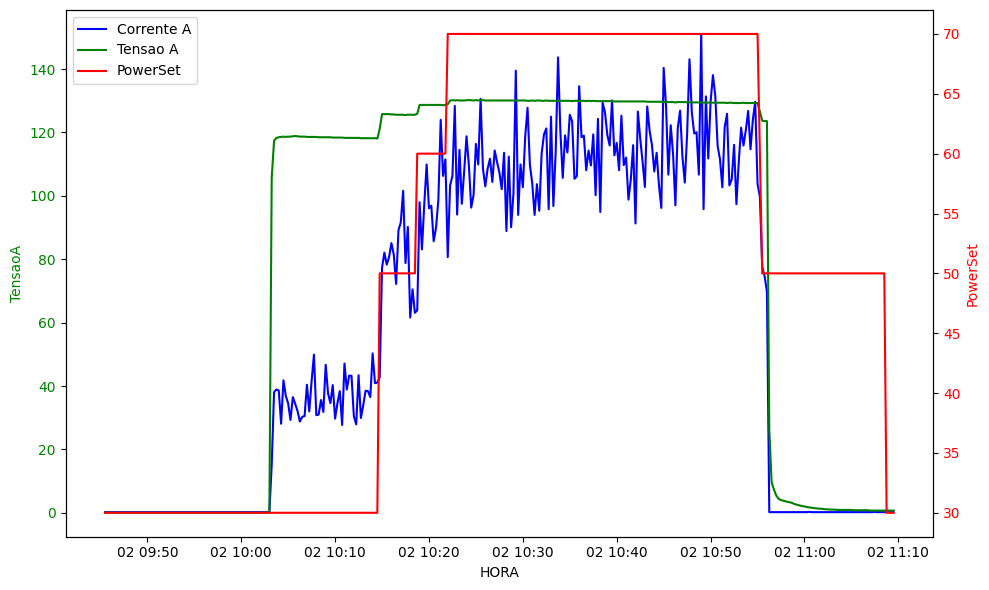

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar os dados para o primeiro eixo y (esquerda)
ax1.plot(db_dia['HORA'], db_dia['Corrente_A_[A]'], label='Corrente A', color='blue')
ax1.set_xlabel('HORA')
ax1.set_ylabel('Corrente A', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plotar 'TensaoA' no eixo y principal
ax1.plot(db_dia['HORA'], db_dia['Tensao_A_[V]'], label='Tensao A', color='green')
ax1.set_ylabel('TensaoA', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Criar o segundo eixo y (direita)
ax2 = ax1.twinx()
ax2.plot(db_dia['HORA'], db_dia['PowerSet_[%]'], label='PowerSet', color='red')
ax2.set_ylabel('PowerSet', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

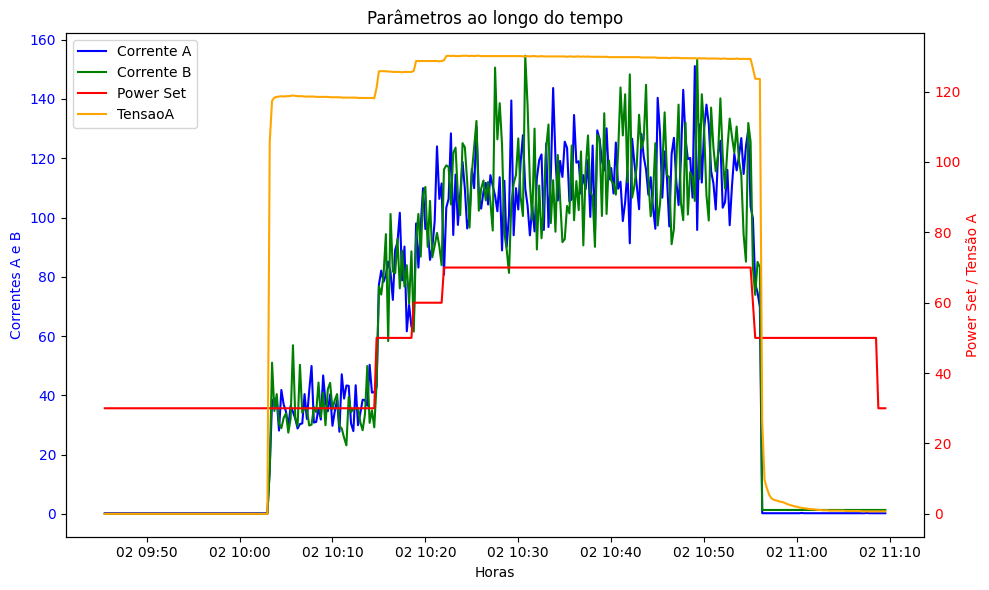

In [18]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotar os dados para o primeiro eixo y (esquerda)

ax1.plot(db_dia['HORA'], db_dia['Corrente_A_[A]'], label='Corrente A', color='blue')
ax1.plot(db_dia['HORA'], db_dia['Corrente_B_[A]'], label='Corrente B', color='green')
ax1.set_xlabel('Horas')
ax1.set_ylabel('Correntes A e B', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Plotar 'TensaoA' no eixo y principal]

ax2 = ax1.twinx()
ax2.plot(db_dia['HORA'], db_dia['PowerSet_[%]'], label='Power Set', color='red')
ax2.plot(db_dia['HORA'], db_dia['Tensao_A_[V]'], label='TensaoA', color='orange')
ax2.set_ylabel('Power Set / Tensão A', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Adicionar legenda
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')

# Título do gráfico
plt.title('Parâmetros ao longo do tempo')

# Rotacionar os rótulos do eixo x para melhorar a legibilidade
plt.xticks(rotation=45)

# Exibir o gráfico
plt.tight_layout()
plt.show()

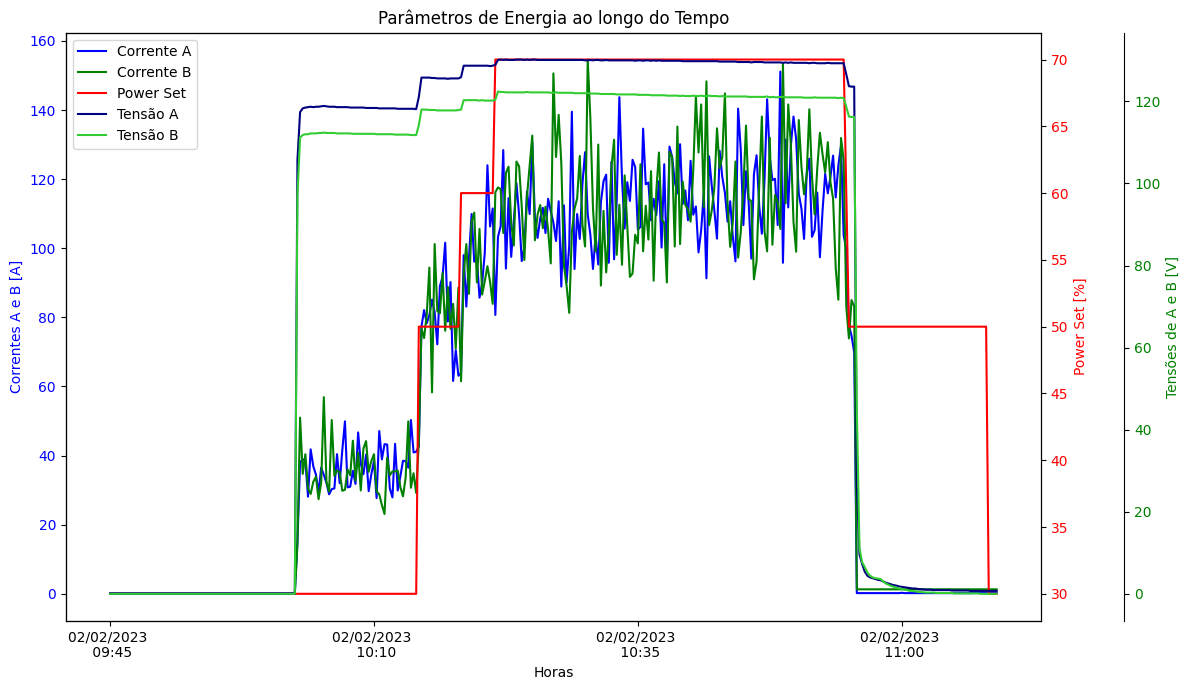

In [19]:
# Criar o gráfico
fig, ax1 = plt.subplots(figsize=(12, 7))

# PLOTANDO OS DADOS E CRIANDO O EIXO Y ESQUERDO
ax1.plot(db_dia['HORA'], db_dia['Corrente_A_[A]'], label='Corrente A', color='blue')
ax1.plot(db_dia['HORA'], db_dia['Corrente_B_[A]'], label='Corrente B', color='green')
ax1.set_xlabel('Horas')
ax1.set_ylabel('Correntes A e B [A]', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# CRIANDO O 1º EIXO Y DO LADO DIREITO
ax1_2 = ax1.twinx()
ax1_2.plot(db_dia['HORA'], db_dia['PowerSet_[%]'], label='Power Set', color='red')
ax1_2.set_ylabel('Power Set [%]', color='red')
ax1_2.tick_params(axis='y', labelcolor='red')

# CRIANDO O 2º EIXO Y DO LADO DIREITO
ax1_3 = ax1.twinx()
ax1_3.spines['right'].set_position(('outward', 60))
ax1_3.plot(db_dia['HORA'], db_dia['Tensao_A_[V]'], label='Tensão A', color='navy')
ax1_3.plot(db_dia['HORA'], db_dia['Tensao_B_[V]'], label='Tensão B', color='limegreen')
ax1_3.set_ylabel('Tensões de A e B [V]', color='green')
ax1_3.tick_params(axis='y', labelcolor='green')

# ADICIONADNDO A LEGENDA
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_2.get_legend_handles_labels()
lines3, labels3 = ax1_3.get_legend_handles_labels()
ax1.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')

# COLOCANDO O TÍTULO DO GRÁFICO
plt.title('Parâmetros de Energia ao longo do Tempo')

# EDITANDO O EIXO X.
plt.xticks(rotation=90)
ax1.set_xticks(db_dia['HORA'][::100])  # Exibe apenas cada 100º tick para evitar sobreposição
# ax1.set_xticklabels(db_dia['HORA'][::100].dt.strftime('%Y-%m-%d %H:%M:%S'))  # Formata as labels de acordo
# ax1.set_xticklabels(db_dia['HORA'][::100].dt.strftime('%Y-%m-%d %H:%M'))
ax1.set_xticklabels(db_dia['HORA'][::100].dt.strftime('%d/%m/%Y \n %H:%M'))


# MOSTRANDO O GRÁFICO
plt.tight_layout()
plt.show()

In [20]:
# Extrair as datas da coluna 'HORA' e armazenar em uma nova coluna chamada 'DIA'
db['DIA'] = db['HORA'].dt.date

# Remover duplicatas da coluna 'DIA'
sem_repeticao = db['DIA'].drop_duplicates()

display(sem_repeticao)

0        2023-02-02
337      2023-02-07
709      2023-02-09
1112     2023-02-14
1537     2023-02-16
            ...    
52430    2023-12-18
52436    2023-12-26
52804    2023-12-27
52863    2023-12-28
56009    2023-12-29
Name: DIA, Length: 81, dtype: object